param  0  =  9.731005395638162 +/- 1.3275884501551052
param  1  =  3.8030800720343265 +/- 0.7300892478437379
Chi-square, degrees of freedom, reduced chi-square:  6.826060967420309 8 0.8532576209275387
p-test value :  0.5555105711059156


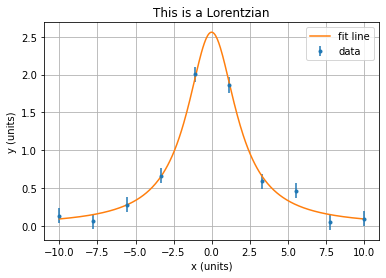

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp
import scipy.optimize
import scipy.stats as stat
#here we import all our desired packages 
# %matplotlib inline is just for Jupyter notebook users that want to render a quick plot

#uncomment these lines if you want to use the unpack feature 
###datafilename = 'somefile.txt'
###y,x  = np.loadtxt(datafilename,unpack=1)

#unpacks space separated text file columns into y and x arrays
#you may add more variables to unpack as necessary 


#Firts, we are not going to use a data input for demonstration.
#Instead we will generate a data set from a model 
# sprinkle in some noise and fit it to iself 

#first lets define our model fucntion 
#how about a Lorentzian function? If you don't know what it is: no problem. It is a "bell_curve" function that's
#different from a Gaussian one.
def LorenLine(x, A,B): 
    return A/(B+x*x)


# onto fabricating a dataset to fit 

n_data = 10
#decide how many data points we will simulate

xdata = np.linspace(-10,10,n_data)
#linspace is a numpy function (note the np. prefix)
#it generates an array of n_data evenly spaced values from -10 to 10 


nominaly = LorenLine(xdata, 10, 4)
#this is the "theoretical line shape" I suggest you play with the different shape parameters of the function 
# to see how the function changes shape with and see which parameters are more sensitve than others 

#now to add some noise to the ideal model

noise_std = 0.1

noise = noise_std*np.random.randn(n_data)

#np.random.randn(n_data) gives us an array of n_data random numbers drawn from a Gaussian
#distribution with average=0 and standard deviation=1. If we want some other mu and sigma,
#we can do "sigma * np.random.randn(n_data) + mu"
#we will add this to our theoretical line to simulate an "experimental signal"


noisyline= noise+nominaly
#bear in mind when adding arrays in python the elements add index by index eg: A[i]+B[i]=C[i]
error= noise_std*np.ones(n_data)
#fill a n_data value sized array with the standard deviation of our noise

#now to fit the noisy line 

parms, covariance = scipy.optimize.curve_fit(LorenLine,xdata,noisyline,sigma=error,p0=None,absolute_sigma=True)

#READ DOCUMENTATION here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
#The goal is to understand the meaning of the above pararmeters of the function and to understand what 
#the function calulates as its output.
# absolute_sigma=True is SUPER important. If you don't do that, the covariance matrix that contains the 
# uncertainties of the fitted pararemetrs will be WRONG!
#
#IMPORTANT: in your report you have to state explicitely which function 
# you used to do the fit (even if it is not this one).

for i in range(0,len(parms)):
    print('param ',i,' = ',parms[i], '+/-', np.sqrt(covariance[i,i]))

fitline= LorenLine(xdata, *parms)
# Note that above, * is used in front of parms to let python know that we use an array 
# to relay LorenLine parameters instead of doing in one by one: A,B

# now for some chi square magic to see how well we did 

chisq = sum( (noisyline-fitline)**2 / error**2 )

ndf = len(xdata)-len(parms)

chisq_reduced = chisq/float(ndf)

print('Chi-square, degrees of freedom, reduced chi-square: ',chisq,ndf,chisq_reduced)
print('p-test value : ',1.-stat.chi2.cdf(chisq,df=ndf))

#for the Chisquare with a given number of degrees of freedom the p-test value 
#is just one minus the cummilative distribtion 
#fucntion (CDF) of the chisquare probabilty distribution evaluated at the calculated value of ChiSq

#Note that the reduced Chi2 = (Chi2/ndf) is just a "shortcut" that allows us to quickly decide if 
#the data agrees with the model.
#If reduced Chi2 is about equal to one: we are definitely good, because (Chi2/ndf)=1 corresponds to 
#the p-value of 0.5

#Importantly, you can have (Chi2/ndf) significantly larger than one and still have p-value > 0.05.
#Example:
#Chi-square = 14.58514088020246; degrees of freedom = 8; reduced Chi-square = 1.8231426100253074
#p-test value :  0.067732169890656

#CONCLUSION: Always calculate p-value using Chi2 and ndf

#now onto plot making 
plt.errorbar(xdata,noisyline,yerr=error,fmt='.',ls=None, label='data')

xdata_plot = np.linspace(-10,10,400)
fitline_plot= LorenLine(xdata_plot, *parms)
# make a finer grain array with x and fitline values to have a smoother fitline on the plot

plt.plot(xdata_plot, fitline_plot,label="fit line")
plt.title('This is a Lorentzian')
plt.grid()
plt.legend()
plot_xlabel = 'x (units)'
plot_ylabel = 'y (units)'
plt.xlabel(plot_xlabel)
plt.ylabel(plot_ylabel)
plt.show()


param  0  =  9.62263694865334 +/- 0.19550726552273417
Chi-square, degrees of freedom, reduced chi-square:  4.746679697497241 3 1.5822265658324135
p-test value :  0.1913144565559458
g weighted average =  9.507966138081088 +/- 0.1955072644806284
Z score =  1.4937238403632256
CDF =  0.9323760926727442
two tailed p-value =  0.13524781465451152


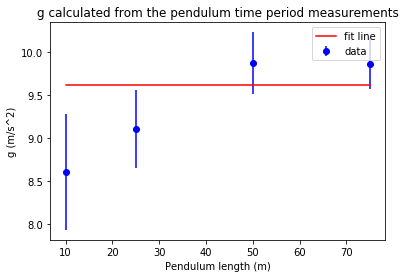

In [38]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
import scipy as sc
import scipy.stats as stat
#
# generate random floating point values
from numpy.random import seed
from numpy.random import rand
from scipy import stats

#expected g
g=9.8

#measured L
L = (10, 25, 50, 75)
L = np.array (L,dtype=np.float)

#measured g at different L and uncertianties of g
g_meas = np.array([8.60341904, 9.10147158, 9.87179984, 9.86823165],dtype=np.float)

error = np.array([0.67636208, 0.4559837,  0.36170647, 0.29458552],dtype=np.float)




# define my model function
def Line(x, g): 
    return g

parms, covariance = sc.optimize.curve_fit(Line,L,g_meas,sigma=error,p0=None,absolute_sigma=True)
for i in range(0,len(parms)):
    print('param ',i,' = ',parms[i], '+/-', np.sqrt(covariance[i,i]))

fitline= Line(L, *parms)
# now for some chi square magic to see how well we did 

chisq = sum( (g_meas-fitline)**2 / error**2 )

dof = len(L)-len(parms)

chisq_reduced = chisq/float(dof)

print('Chi-square, degrees of freedom, reduced chi-square: ',chisq,dof,chisq_reduced)
print('p-test value : ',1.-stat.chi2.cdf(chisq,df=dof))



# Now, calculate weighted average of g measured.

weights = np.sum(1 / error)

g_waverage = (1/weights)*np.sum(g_meas / error)

g_waverage_STD = m.sqrt(1/np.sum(1/(error*error)))

print('g weighted average = ',g_waverage, '+/-', g_waverage_STD)

# Comapre measured and predicted value using Gaussian z-score.

Zscore = (g - g_waverage)/g_waverage_STD

print('Z score = ',Zscore)

cdf = sc.stats.norm.cdf(Zscore,0,1)

print ("CDF = ",sc.stats.norm.cdf(Zscore,0,1))

if cdf>0.5:
    pvalue_2t = 2*(1-cdf)
else :
    pvalue_2t=2*(cdf)

print ("two tailed p-value = ",pvalue_2t)

#plot the data and the fit line
plt.title("g calculated from the pendulum time period measurements") 
plt.xlabel("Pendulum length (m)") 
plt.ylabel("g (m/s^2)") 
plt.errorbar(L,g_meas,yerr=error,fmt='ob',label="data") 

y_values = np.full((4),fitline)
plt.plot(L, y_values, markersize=2 ,label="fit line", color="red")

plt.legend()


plt.show()




plt.show()

######################
